In [114]:
# 피클 데이터 불러오기 
import pickle
import pandas as pd
test = pd.read_pickle("token_test_data.pkl")
train = pd.read_pickle("token_train_data.pkl")

In [83]:
# Tokenizer / Padding 임포트 
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [115]:
# train data 확인 
train 

,tokens,labels
0,"[더빙, 진짜, 짜증나다, 목소리]",0
1,"[흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 가볍다]",1
2,"[무재, 밓었, 다그, 래서, 추천]",0
3,"[교도소, 이야기, 구먼, 솔직하다, 재미, 없다, 평점, 조정]",0
4,"[몬페, 의, 익살스럽다, 연기, 영화, 스파이더맨, 커스틴, 던스트, 이쁘다]",1
...,...,...
145786,"[인간, 문제, 소, 죄인]",0
145787,"[평점, 낮다]",1
145788,"[이, 뭐, 한국인, 먹거리, 필리핀, 혼혈, 착하다]",0
145789,"[청춘, 영화, 최고봉, 방황, 우울하다, 날, 자화상]",1


In [116]:
# test data 확인 
test

,tokens,labels
0,[굳다],1
1,"[뭐, 이, 평점, 나쁘다, 점, 리, 더, 더욱, 아니다]",0
2,"[지루하다, 완전, 막장, 임, 돈, 보기]",0
3,"[만, 아니다, 별, 다섯, 개, 왜, 로, 제, 심기, 불편하다]",0
4,"[음악, 주가, 최고, 음악, 영화]",1
...,...,...
48990,"[만, 평점, 로, 킹왕짱, 쌈뽕, 영화, 강렬하다, 쾌함]",1
48991,"[의지, 박약, 탈영, 일단, 주인공, 김대희, 이등병]",0
48992,"[그림, 좋다, 완성, 도도, 높다, 내내, 불안하다]",0
48993,"[절대, 안, 영화, 재미, 없다, 기분, 잡, 세트, 해먹]",0


In [117]:
# train, test 명시 
training_sentences = train['tokens']
testing_sentences = test['tokens']

training_labels = train['labels']
testing_labels = test['labels']

training_sentences.shape, testing_sentences.shape, training_labels.shape, testing_labels.shape

In [132]:
training_sentences

0                                  [더빙, 진짜, 짜증나다, 목소리]
1                 [흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 가볍다]
2                                 [무재, 밓었, 다그, 래서, 추천]
3                 [교도소, 이야기, 구먼, 솔직하다, 재미, 없다, 평점, 조정]
4         [몬페, 의, 익살스럽다, 연기, 영화, 스파이더맨, 커스틴, 던스트, 이쁘다]
                              ...                     
145786                                 [인간, 문제, 소, 죄인]
145787                                        [평점, 낮다]
145788                  [이, 뭐, 한국인, 먹거리, 필리핀, 혼혈, 착하다]
145789                 [청춘, 영화, 최고봉, 방황, 우울하다, 날, 자화상]
145790                        [한국, 영화, 최초, 수간, 내용, 영화]
Name: tokens, Length: 145791, dtype: object

In [185]:
# 파라미터 명시 
vocab_size = 20000
embedding_dim = 200
max_length = 53
truct_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [186]:
# Tokenize 및 word_index 확인 
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

word_index, len(word_index)

({'<PAD>': 1,
  '영화': 2,
  '없다': 3,
  '있다': 4,
  '좋다': 5,
  '재밌다': 6,
  '정말': 7,
  '것': 8,
  '같다': 9,
  '진짜': 10,
  '아니다': 11,
  '점': 12,
  '이': 13,
  '연기': 14,
  '평점': 15,
  '최고': 16,
  '왜': 17,
  '스토리': 18,
  '생각': 19,
  '드라마': 20,
  '감동': 21,
  '사람': 22,
  '보고': 23,
  '말': 24,
  '이렇다': 25,
  '아깝다': 26,
  '더': 27,
  '배우': 28,
  '때': 29,
  '감독': 30,
  '거': 31,
  '내': 32,
  '재미있다': 33,
  '뭐': 34,
  '시간': 35,
  '재미': 36,
  '내용': 37,
  '그냥': 38,
  '좀': 39,
  '그': 40,
  '지루하다': 41,
  '재미없다': 42,
  '쓰레기': 43,
  '수': 44,
  '그렇다': 45,
  '작품': 46,
  '사랑': 47,
  '나': 48,
  '하나': 49,
  '다시': 50,
  '마지막': 51,
  '볼': 52,
  '이다': 53,
  '정도': 54,
  '처음': 55,
  '완전': 56,
  '많다': 57,
  '장면': 58,
  '액션': 59,
  '주인공': 60,
  '안되다': 61,
  '돈': 62,
  '최악': 63,
  '이야기': 64,
  '지금': 65,
  '걸': 66,
  '느낌': 67,
  '연출': 68,
  '임': 69,
  '끝': 70,
  '듯': 71,
  '좋아하다': 72,
  '명작': 73,
  '별로': 74,
  '년': 75,
  '역시': 76,
  '개': 77,
  '이해': 78,
  '안': 79,
  '이영화': 80,
  '괜찮다': 81,
  '또': 82,
  '때문': 83,
  '여자': 84,


In [188]:
# Sequence 만들기 / Padding하기 - train, test 모두 
training_sequences  = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=truct_type)


testing_sequences  = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=truct_type)




In [189]:
# array로 바꾸기 
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [190]:
training_padded.shape

(145791, 53)

In [191]:
# 모델링 
embedding_dim = 200
filter_sizes = (3, 4, 5)
num_filters = 100
dropout = 0.5
hidden_dims = 100

conv_blocks =[]
input_shape = (53, )
model_input = tf.keras.layers.Input(shape=input_shape)
z = model_input
for sz in filter_sizes:
    embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length)(z)
    conv = tf.keras.layers.Conv1D(filters=num_filters,
                         kernel_size=sz,
                         padding="valid",
                         activation="relu",
                         strides=1)(embedding)
    conv = tf.keras.layers.GlobalAveragePooling1D()(conv)
    conv = tf.keras.layers.Flatten()(conv)
    conv_blocks.append(conv)
z = tf.keras.layers.Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]

z = tf.keras.layers.Dropout(dropout)(z)
z = tf.keras.layers.Dense(hidden_dims, activation="relu")(z)
model_output = tf.keras.layers.Dense(1, activation="sigmoid")(z)


In [180]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 53, 200)           4000000   
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 49, 100)           100100    
_________________________________________________________________
global_average_pooling1d_22  (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 24)                2424      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 25        
Total params: 4,102,549
Trainable params: 4,102,549
Non-trainable params: 0
_________________________________________________________________


In [192]:
# 모델 컴파일 
batch_size = 50
num_epochs = 10
min_word_count = 1
context = 10


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [193]:
# model training 
num_epochs = 5
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/5
4556/4556 [==============================] - 417s 92ms/step - loss: 0.4062 - accuracy: 0.8109 - val_loss: 0.3789 - val_accuracy: 0.8276
Epoch 2/5
4556/4556 [==============================] - 384s 84ms/step - loss: 0.3285 - accuracy: 0.8546 - val_loss: 0.3794 - val_accuracy: 0.8312
Epoch 3/5
4556/4556 [==============================] - 386s 85ms/step - loss: 0.2765 - accuracy: 0.8805 - val_loss: 0.4098 - val_accuracy: 0.8277
Epoch 4/5
4556/4556 [==============================] - 368s 81ms/step - loss: 0.2278 - accuracy: 0.9038 - val_loss: 0.4522 - val_accuracy: 0.8227
Epoch 5/5
4556/4556 [==============================] - 367s 81ms/step - loss: 0.1907 - accuracy: 0.9206 - val_loss: 0.5488 - val_accuracy: 0.8183


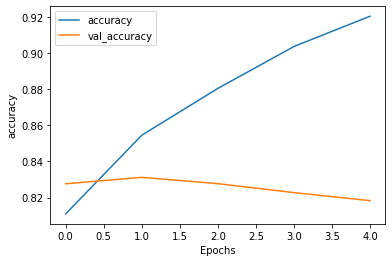

In [218]:
# accuracy 그래프 저장 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_' + 'accuracy'])
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_' + 'accuracy'])

fig = plt.gcf() 
plt.show()
fig.savefig('./model3_1st_accuracy')


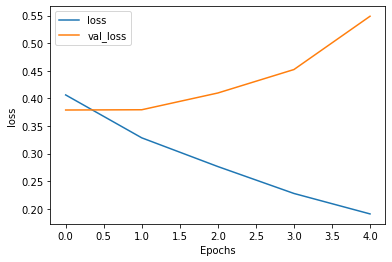

In [219]:
# loss 그래프 저장 
plt.plot(history.history['loss'])
plt.plot(history.history['val_' + 'loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['loss', 'val_' + 'loss'])

fig = plt.gcf() 
plt.show()
fig.savefig('./model3_1st_loss')
